# 📊 Auto MPG Dataset - Exploratory Data Analysis (EDA)

This notebook contains a complete EDA tutorial for the Auto MPG dataset, created for Unit 2 Seminar of the MSc Artificial Intelligence programme at the University of Essex.

## 🔍 Overview

The notebook demonstrates the following steps:
- Importing and cleaning the dataset
- Identifying missing values and handling non-numeric entries
- Estimating skewness and kurtosis for distribution analysis
- Creating a correlation heatmap for feature relationships
- Generating scatter plots to explore variable trends
- Mapping and encoding categorical variables

## 🛠️ Technologies Used

- Python 3
- Pandas
- Matplotlib
- Seaborn
- SciPy
- Google Colab / Jupyter Notebook

## 📁 Files

- `AutoMPG_EDA_Tutorial_Updated.ipynb`: Final notebook including all EDA steps
- `Unit02 auto-mpg (1).csv`: The dataset used for the analysis

## 🚀 How to Run

1. Open [Google Colab](https://colab.research.google.com/)
2. Upload the notebook and dataset files
3. Run cells step-by-step or all at once
4. Explore insights and visualizations

## 📚 Learning Outcomes

- Apply core EDA techniques using Python
- Understand dataset structure and potential issues
- Prepare data for machine learning models
- Communicate insights through visuals

---

**Author**: Abdullah Alshibli  
**University**: University of Essex  
**Module**: MSc AI – Unit 2 Seminar  


# 📊 Auto MPG Dataset - Exploratory Data Analysis (EDA)
This notebook walks through key EDA steps using the Auto MPG dataset.

## ✅ Step 1: Setup
Install libraries (if needed) and load the dataset into a Pandas DataFrame.

In [1]:
# If running in Google Colab, uncomment the next line to install seaborn
# !pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load the Auto MPG dataset (upload manually if using Colab)
from google.colab import files
uploaded = files.upload()

# Replace with actual filename
df = pd.read_csv('Unit02 auto-mpg (1).csv')
df.head()

Saving Unit02 auto-mpg (1).csv to Unit02 auto-mpg (1).csv


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## ✅ Step 2: Identify Missing Values
Check for missing values or invalid entries.

In [2]:
# Replace '?' with NaN and convert to float (safe assignment)
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)

# Show missing value count
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


## ✅ Step 3: Estimate Skewness and Kurtosis
Understand the distribution shape of numeric data.

In [3]:
# Calculate skewness and kurtosis
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    print(f"{col} - Skewness: {skew(df[col].dropna()):.2f}, Kurtosis: {kurtosis(df[col].dropna()):.2f}")

mpg - Skewness: 0.46, Kurtosis: -0.52
cylinders - Skewness: 0.52, Kurtosis: -1.37
displacement - Skewness: 0.72, Kurtosis: -0.75
horsepower - Skewness: 1.08, Kurtosis: 0.67
weight - Skewness: 0.53, Kurtosis: -0.79
acceleration - Skewness: 0.28, Kurtosis: 0.40
model year - Skewness: 0.01, Kurtosis: -1.18
origin - Skewness: 0.92, Kurtosis: -0.82


## ✅ Step 4: Correlation Heatmap
Visualize relationships between numeric variables.

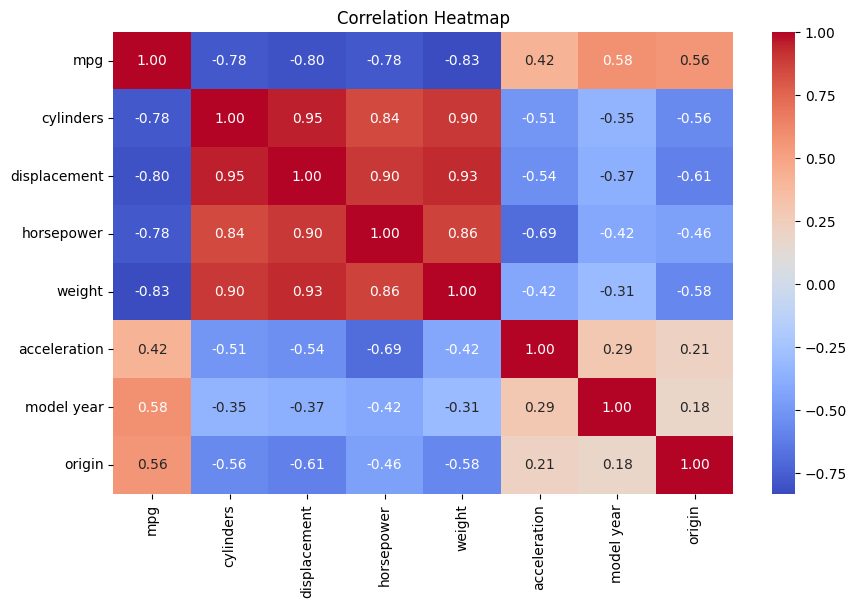

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## ✅ Step 5: Scatter Plots
Visualize trends between `mpg` and other variables.

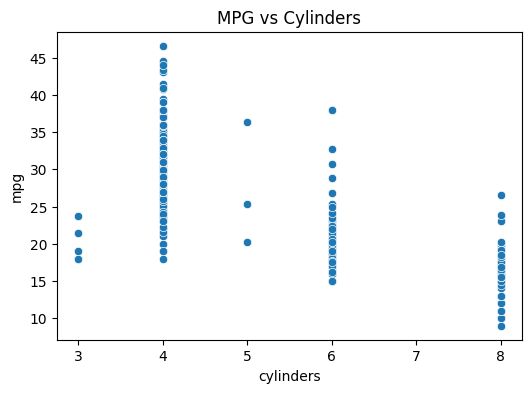

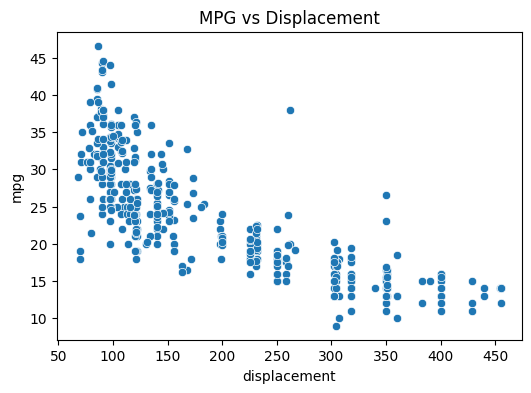

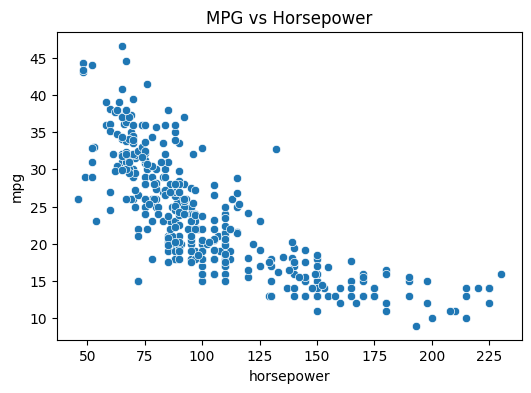

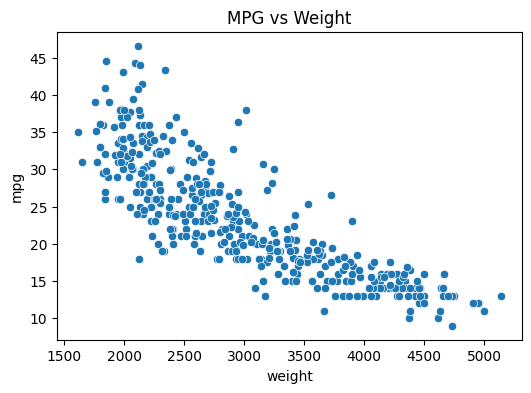

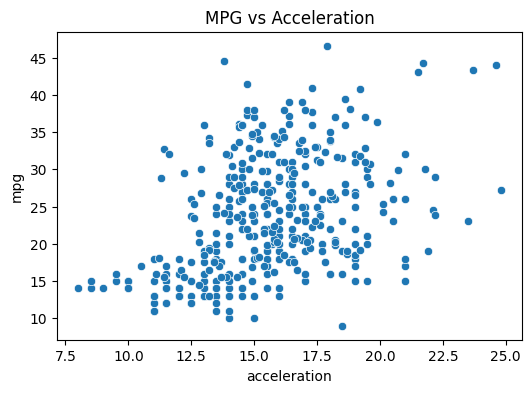

In [5]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='mpg')
    plt.title(f"MPG vs {feature.capitalize()}")
    plt.show()

## ✅ Step 6: Replace Categorical Values
Map origin to readable labels, then apply one-hot encoding.

In [6]:
# Clean column names
df.columns = df.columns.str.strip()

# Only map origin if it's not already encoded
if 'origin' in df.columns:
    df['origin'] = df['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
    df = pd.get_dummies(df, columns=['origin'])

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_Europe,origin_Japan,origin_USA
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,False,False,True
